In [1]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df1.head(5)


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [2]:
df = df1.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

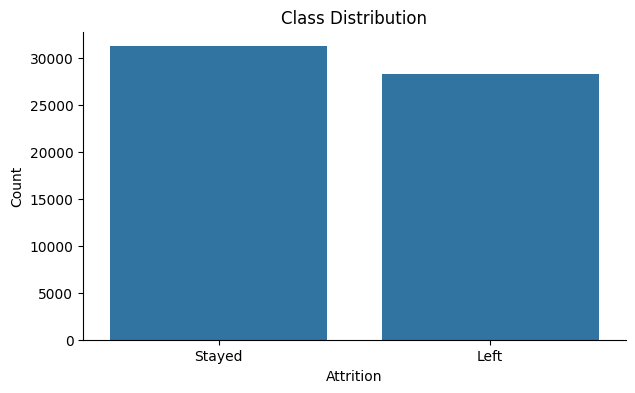

In [4]:
#Class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x='Attrition', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Attrition')
plt.title('Class Distribution')
plt.ylabel('Count')

plt.show()

In [5]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Get unique values for each categorical column
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col} ➜ {len(unique_vals)} unique values")
    print(unique_vals, "\n")

Gender ➜ 2 unique values
['Male' 'Female'] 

Job Role ➜ 5 unique values
['Education' 'Media' 'Healthcare' 'Technology' 'Finance'] 

Work-Life Balance ➜ 4 unique values
['Excellent' 'Poor' 'Good' 'Fair'] 

Job Satisfaction ➜ 4 unique values
['Medium' 'High' 'Very High' 'Low'] 

Performance Rating ➜ 4 unique values
['Average' 'Low' 'High' 'Below Average'] 

Overtime ➜ 2 unique values
['No' 'Yes'] 

Education Level ➜ 5 unique values
['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD'] 

Marital Status ➜ 3 unique values
['Married' 'Divorced' 'Single'] 

Job Level ➜ 3 unique values
['Mid' 'Senior' 'Entry'] 

Company Size ➜ 3 unique values
['Medium' 'Small' 'Large'] 

Remote Work ➜ 2 unique values
['No' 'Yes'] 

Leadership Opportunities ➜ 2 unique values
['No' 'Yes'] 

Innovation Opportunities ➜ 2 unique values
['No' 'Yes'] 

Company Reputation ➜ 4 unique values
['Excellent' 'Fair' 'Poor' 'Good'] 

Employee Recognition ➜ 4 unique values
['Medium' 'Low' 'High' 'Very

In [6]:
len(categorical_cols)

16

In [6]:
#Encode Categorical features

binary_map = {'No': 0, 'Yes': 1}
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Overtime'] = df['Overtime'].map(binary_map)
df['Remote Work'] = df['Remote Work'].map(binary_map)
df['Leadership Opportunities'] = df['Leadership Opportunities'].map(binary_map)
df['Innovation Opportunities'] = df['Innovation Opportunities'].map(binary_map)
df['Attrition'] = df['Attrition'].map({'Stayed': 0, 'Left': 1})

# Ordinal mappings
df['Work-Life Balance'] = df['Work-Life Balance'].map({
    'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3
})

df['Job Satisfaction'] = df['Job Satisfaction'].map({
    'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3
})

df['Performance Rating'] = df['Performance Rating'].map({
    'Low': 0, 'Below Average': 1, 'Average': 2, 'High': 3
})

df['Education Level'] = df['Education Level'].map({
    'High School': 0,
    'Associate Degree': 1,
    'Bachelor’s Degree': 2,
    'Master’s Degree': 3,
    'PhD': 4
})

df['Job Level'] = df['Job Level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2})

df['Company Size'] = df['Company Size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

df['Company Reputation'] = df['Company Reputation'].map({
    'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3
})

df['Employee Recognition'] = df['Employee Recognition'].map({
    'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3
})

# One-hot encode nominal features
df = pd.get_dummies(df, columns=['Job Role', 'Marital Status'], drop_first=True)

In [7]:
df.head(5)

,Employee ID,Age,Gender,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Married,Marital Status_Single
0,8410,31,0,19,5390,3,1,2,2,0,...,0,3,1,0,False,False,False,False,True,False
1,64756,59,1,4,5534,0,2,0,3,0,...,0,1,0,0,False,False,True,False,False,False
2,30257,24,1,10,8159,2,2,0,0,0,...,0,0,0,0,False,True,False,False,True,False
3,65791,36,1,7,3989,2,2,3,1,0,...,0,2,1,0,False,False,False,False,False,True
4,65026,56,0,41,4821,1,3,2,0,1,...,0,1,1,0,False,False,False,False,False,False


In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,59598.0,37227.118729,21519.150028,1.0,18580.25,37209.5,55876.75,74498.0
Age,59598.0,38.565875,12.079673,18.0,28.00,39.0,49.00,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,7.00,13.0,23.00,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,5658.00,7354.0,8880.00,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.00,1.0,2.00,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,25.00,50.0,75.00,99.0
Number of Dependents,59598.0,1.648075,1.555689,0.0,0.00,1.0,3.00,6.0
Company Tenure,59598.0,55.758415,25.411090,2.0,36.00,56.0,76.00,128.0


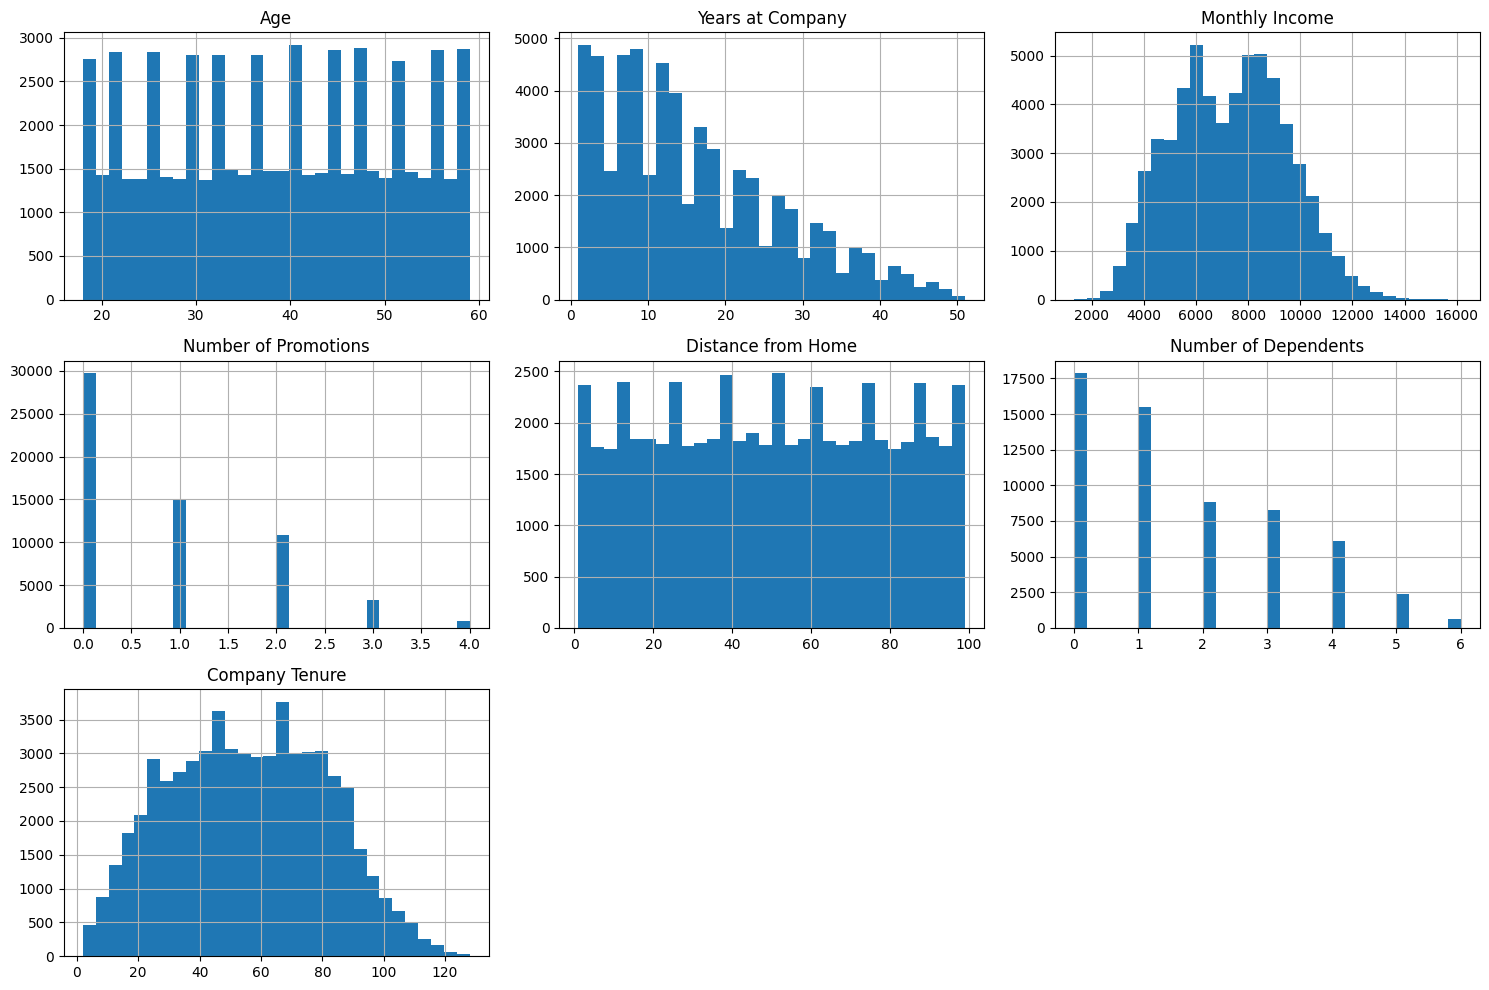

In [ ]:
numerical_cols = [
    'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
    'Distance from Home', 'Number of Dependents', 'Company Tenure'
]

# Univariate analysis of numerical features

# Plot histograms
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

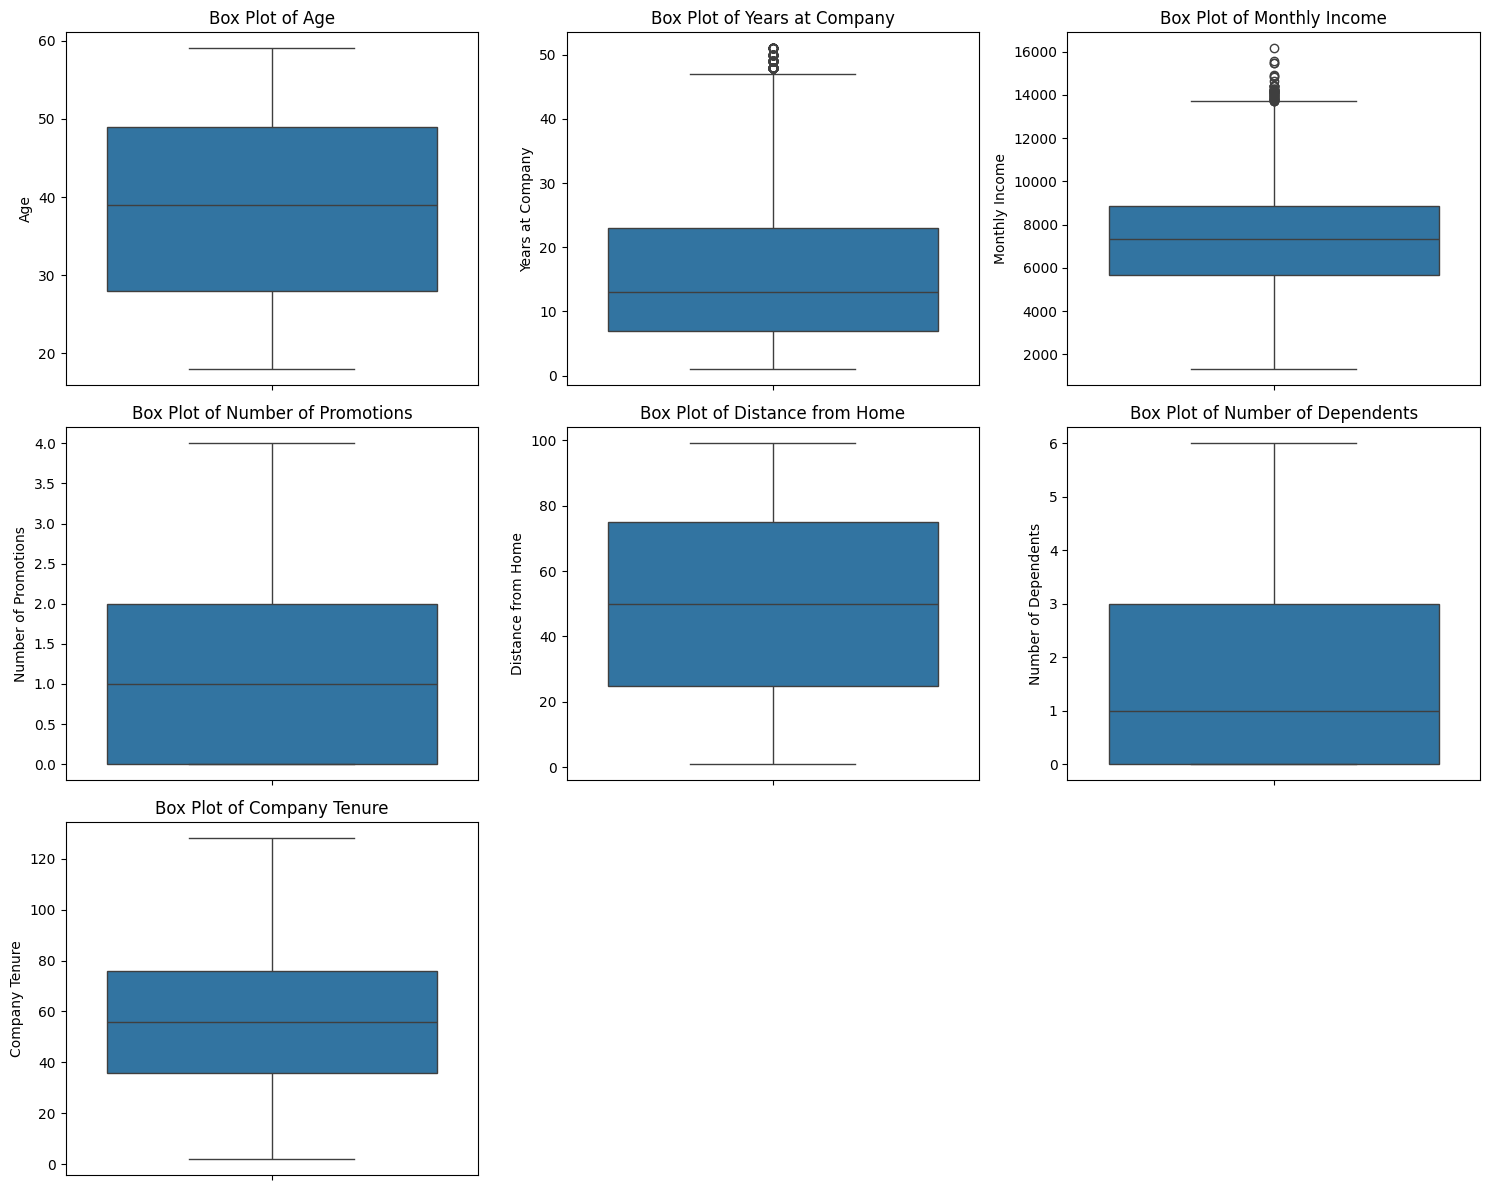

In [22]:

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [23]:
df[numerical_cols].skew()


Age                    -0.007047
Years at Company        0.788144
Monthly Income          0.115091
Number of Promotions    0.993426
Distance from Home      0.002879
Number of Dependents    0.715559
Company Tenure          0.066688
dtype: float64

In [ ]:
# Remove outliers using IQR method

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    
    return outliers.index


outliers_years = detect_outliers_iqr(df, 'Years at Company')
outliers_income = detect_outliers_iqr(df, 'Monthly Income')

# Combine both sets of outliers
all_outliers = outliers_years.union(outliers_income)

print(f"Total unique outlier rows to remove: {len(all_outliers)}")


Years at Company: 273 outliers
Monthly Income: 50 outliers
Total unique outlier rows to remove: 323


In [9]:
df_cleaned = df.drop(index=all_outliers).reset_index(drop=True)
print(f"New dataset shape: {df_cleaned.shape}")


New dataset shape: (59275, 28)


In [ ]:
# Transform numerical features

from sklearn.preprocessing import StandardScaler
import numpy as np
# Copy original data
df_transformed = df_cleaned.copy()

# Apply log1p transformation to skewed numerical features
df_transformed['Years at Company'] = np.log1p(df_transformed['Years at Company'])
#df_transformed['Monthly Income'] = np.log1p(df_transformed['Monthly Income'])
df_transformed['Number of Promotions'] = np.log1p(df_transformed['Number of Promotions'])

# Optional (if Number of Dependents is strongly skewed and affecting model performance)
#df_transformed['Number of Dependents'] = np.log1p(df_transformed['Number of Dependents'])



# Initialize scaler and scale the numerical features
scaler = StandardScaler()
df_transformed[numerical_cols] = scaler.fit_transform(df_transformed[numerical_cols])

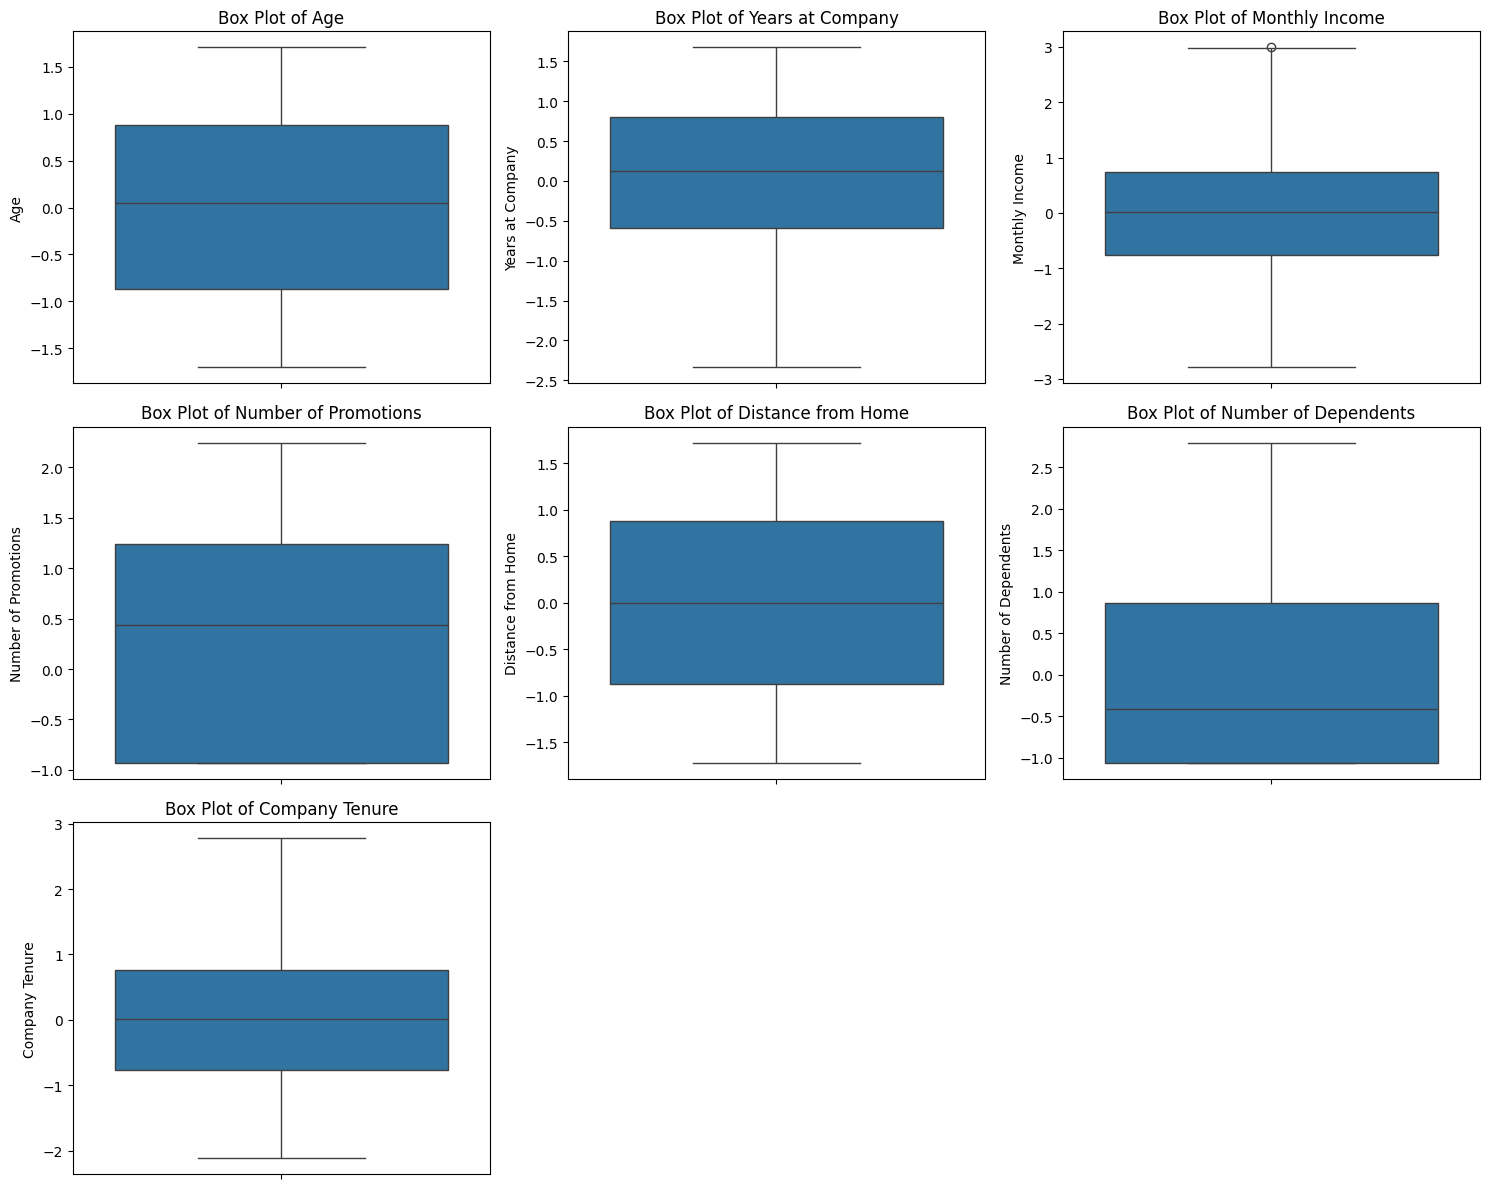

In [13]:
# Plot boxplots after removing outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_transformed, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_transformed.drop(columns=["Attrition","Employee ID"], axis=1)  
y = df_transformed["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Non-tree based models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'LinearSVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier()
}

params = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'LinearSVM': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

# Run GridSearchCV
results = []
for name, model in models.items():
    gs = GridSearchCV(model, params[name], cv=5, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    results.append({
        'model': name,
        'best_params': gs.best_params_,
        'best_score': gs.best_score_
    })

pd.DataFrame(results)

,model,best_params,best_score
0,LogisticRegression,{'C': 10},0.739329
1,LinearSVM,{'C': 1},0.739393
2,KNN,{'n_neighbors': 7},0.680114


# Tree based models 

In [ ]:
# XGBoost Classifier

import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
                               param_grid=xgb_param_grid, 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=2)

# Fit GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best Score for XGBoost: {xgb_grid_search.best_score_}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


d:\balancing\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:56:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score for XGBoost: 0.7601644875579924


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      6249
           1       0.74      0.74      0.74      5606

    accuracy                           0.75     11855
   macro avg       0.75      0.75      0.75     11855
weighted avg       0.75      0.75      0.75     11855



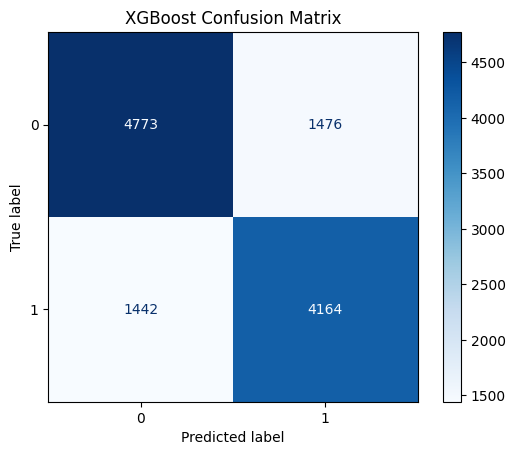

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = xgb_grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
# LightGBM Classifier

import lightgbm as lgb

# Define parameter grid
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'num_leaves': [15, 31, 63]
}

# Initialize LightGBM classifier
lgb_estimator = lgb.LGBMClassifier(random_state=42)

# GridSearchCV
lgb_grid_search = GridSearchCV(estimator=lgb_estimator,
                                param_grid=lgb_param_grid,
                                cv=5,
                                scoring='f1',  # or 'recall', 'accuracy'
                                n_jobs=-1,
                                verbose=2)

# Fit to training data
lgb_grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", lgb_grid_search.best_params_)
print("Best F1 Score:", lgb_grid_search.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22597, number of negative: 24823
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 47420, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476529 -> initscore=-0.093953
[LightGBM] [Info] Start training from score -0.093953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

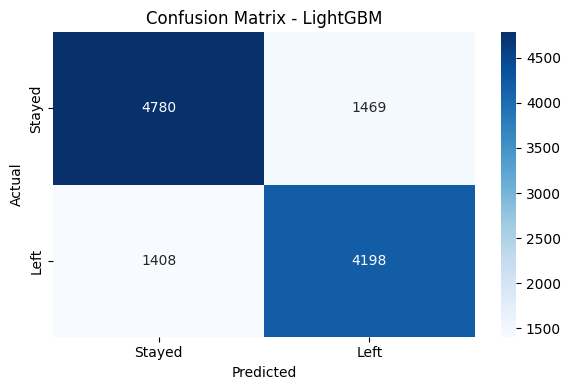

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      6249
           1       0.74      0.75      0.74      5606

    accuracy                           0.76     11855
   macro avg       0.76      0.76      0.76     11855
weighted avg       0.76      0.76      0.76     11855



In [25]:
y_pred = lgb_grid_search.best_estimator_.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

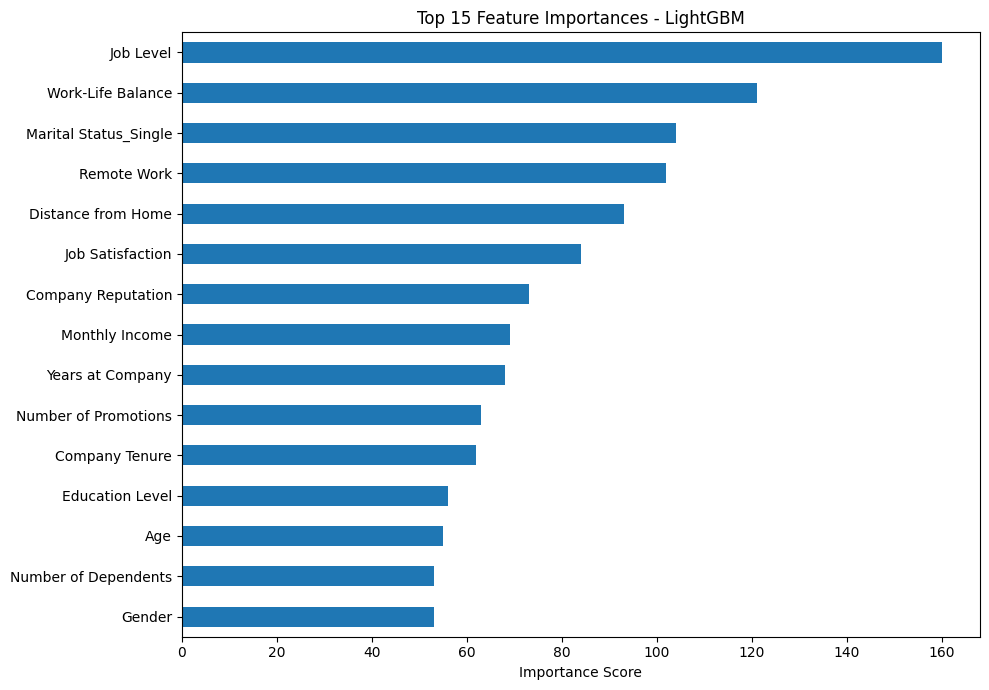

In [ ]:

# Get feature importances
feature_importance = pd.Series(lgb_grid_search.best_estimator_.feature_importances_, index=X_train.columns)

# Plot top features
plt.figure(figsize=(10, 7))
feature_importance.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances - LightGBM')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [27]:
import joblib

# Save the best estimator from grid search
joblib.dump(lgb_grid_search.best_estimator_, 'best_lgb_model.pkl')



['best_lgb_model.pkl']